# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

    
___


## End-to-End Machine Learning Project Exercise

1/ Describe the Task

2/ Get and Explore the Data

3/ Prepare the Data for ML Algorithms!

4/ Select and Train a Model

5/ Fine-Tune the Model!

6/ Interpret the results

___    



# 1/ The Problem 

**1.1 Frame the problem:** 
The task is to build classification model of synthetic simulated data to be able to predict the binary class  based on five features. 

**Assumptions of the problem:** 
* The problem is non-linear 

pass 


**1.2 The expected result:** 
The developed model shall predict class with accuracy > 95 %. 


**Performance measures:** 
pass 



In [48]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 
# %matplotlib inline
import seaborn as sns

from sklearn.datasets import make_classification 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

## Data preparation

In [2]:
# Sample data for classification task

X, y = make_classification(n_samples = 10000, n_features = 5, n_informative = 2, n_redundant = 3, 
                          class_sep = 1, n_clusters_per_class=1, random_state = 42, shuffle = True) 

In [3]:
print(y.shape)
print(X.shape)

(10000,)
(10000, 5)


In [6]:
#
np.unique(y)

array([0, 1])

In [12]:
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['f1', 'f2', 'f3', 'f4', 'f5', 'class'])

In [13]:
df.describe()

,f1,f2,f3,f4,f5,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.607419,-0.001525,0.704738,-0.340941,0.997672,0.499300
std,0.453844,1.246151,0.504925,0.654354,0.772958,0.500025
min,-2.664064,-4.772928,-0.954475,-3.462003,-2.255497,0.000000
25%,-0.891380,-1.011149,0.351082,-0.734445,0.525212,0.000000
50%,-0.613780,0.617205,0.695441,-0.066542,0.994934,0.000000
75%,-0.331441,1.013704,1.061757,0.098724,1.457317,1.000000
max,1.304971,2.550972,2.460123,1.633215,4.629391,1.000000


In [14]:
df

,f1,f2,f3,f4,f5,class
0,-0.285476,0.821274,0.549621,0.178938,0.425130,1.0
1,-1.038843,-1.589798,0.783562,-1.238014,1.790769,0.0
2,-0.528883,-1.415755,0.237801,-0.880490,0.943974,0.0
3,0.869924,1.224670,-0.684482,0.992714,-1.493908,0.0
4,-0.678115,1.133735,1.088451,0.087888,1.053345,1.0
...,...,...,...,...,...,...
9995,-0.958186,1.322792,1.463814,0.008986,1.503252,1.0
9996,-0.346440,0.964025,0.658322,0.203685,0.517655,1.0
9997,-1.163660,1.599888,1.775971,0.008204,1.825961,1.0
9998,-0.775895,-0.988072,0.638190,-0.842407,1.326885,0.0


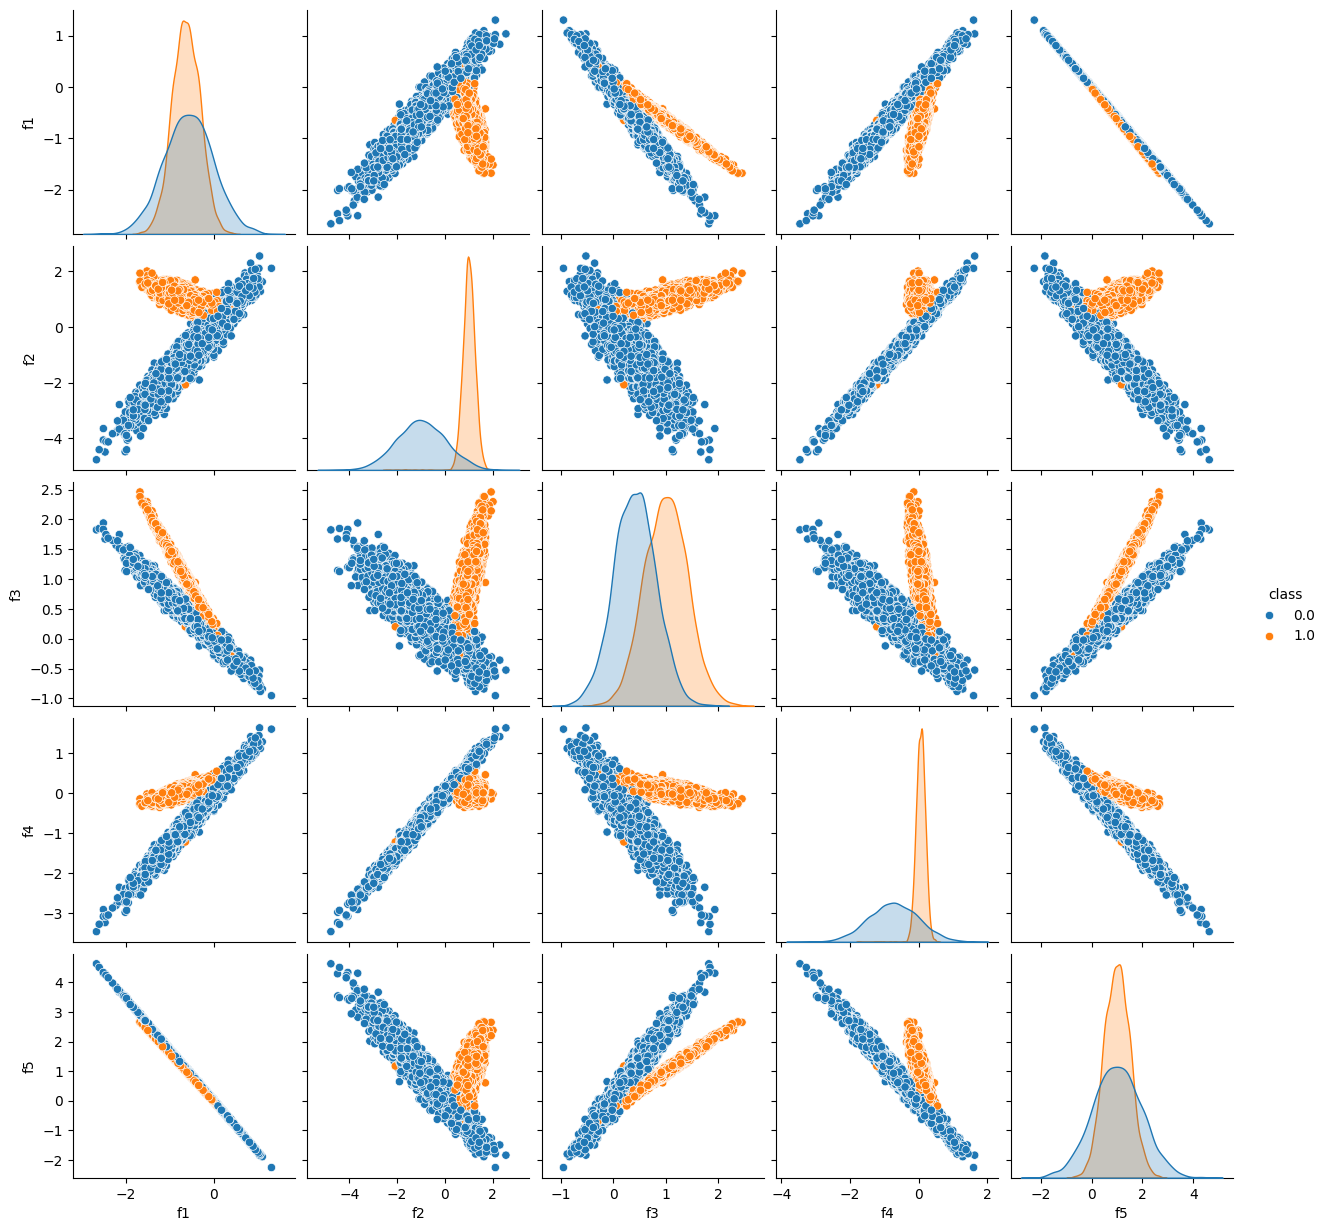

In [15]:
sns.pairplot(df, hue='class')

In [18]:
# uděláme si korelaci protože proč ne
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

class    1.000000
f2       0.796252
f4       0.600725
f3       0.589206
f5      -0.006363
f1      -0.064268
Name: class, dtype: float64

In [24]:
# hledání NaN hodnot
print(df[df.isnull().any(axis=1)]) # - prázdné, takže cajk

Empty DataFrame
Columns: [f1, f2, f3, f4, f5, class]
Index: []


In [21]:
# příprava trénovacích a testovacích dat
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.5, random_state=42)

In [30]:
train_set
print(f'Train set size: {len(train_set)}, Test set size: {len(test_set)}')
train_set["class"]

Train set size: 5000, Test set size: 5000


7660    1.0
275     1.0
2985    1.0
5646    1.0
5849    1.0
       ... 
5734    0.0
5191    0.0
5390    0.0
860     0.0
7270    0.0
Name: class, Length: 5000, dtype: float64

In [34]:
# rozdělit zpět na x_train, y_train a x_test a y_test
x_train = train_set.drop("class", axis = 1)
y_train = train_set["class"]
x_test = test_set.drop("class", axis = 1)
y_test = test_set["class"]

In [36]:
# chceme dělat random forest na grid search
forest_reg = RandomForestRegressor(random_state=42)

In [37]:
#tune the model
hyper_parameters = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 15, 20],
    "min_samples_leaf": [2, 4] # meříkká kolik chci výsledných tříd, ale jaký má být minimální počet prvků na třídu
}

In [40]:
# apply grid search
gs = GridSearchCV(forest_reg, hyper_parameters, n_jobs=4, cv=10,  scoring="neg_mean_absolute_error", return_train_score=True)

In [41]:
#fit the model
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [42]:
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 50}

In [43]:
my_model = gs.best_estimator_

In [46]:
#predikování hodnot
y_train_predict = my_model.predict(x_train)
mea_train_error = mean_absolute_error(y_train,y_train_predict)
mea_train_error


0.016085480381916532

In [52]:
y_test_predict = my_model.predict(x_test)
mea_test_error = mean_absolute_error(y_test,y_test_predict)
100 - (mea_test_error*100)

97.39136352297945

In [97]:
from sklearn.metrics import f1_score
#print(y_test_predict)
#print(y_test)
y_predict_round = y_test_predict.round(decimals=1)
#test_accuracy = f1_score(y_test,y_test_predict)
y_test
y_predict_round
predict_int = y_predict_round.astype(int)
test_int = y_test.astype(int)
test_accuracy = f1_score(test_int,predict_int)
test_accuracy*100


96.42930856553149

In [ ]:
print(f'test accuracy: {test_accuracy*100}%')